In [2]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


## Loading Data

### ClinicalBERT Embeddings

In [3]:
embeddings1 = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_embeddings_10k_train.npy')
labels1 = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_labels_10k_train.npy')

embeddings2 = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_embeddings_10k_train_pt2.npy')
labels2 = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_labels_10k_train_pt2.npy')



FileNotFoundError: [Errno 2] No such file or directory: '/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_labels_10k_train_p2.npy'

In [5]:
combined_embeddings = np.concatenate((embeddings1, embeddings2), axis=0)
combined_labels = np.concatenate((labels1, labels2), axis=0)

In [10]:
del embeddings1
del embeddings2
del labels1
del labels2

In [8]:
np.save('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_embeddings_15k',
        combined_embeddings,
        allow_pickle=True)
    
np.save('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_ClinicalBERT_labels_15k',
        combined_labels,
        allow_pickle=True)

### Train/Dev/Test/Split

In [9]:
combined_embeddings.shape

(15000, 264, 768)

In [12]:
train_X, test_X, train_y, test_y = train_test_split(combined_embeddings, combined_labels, test_size=0.20, random_state=42, stratify=combined_labels)
del combined_embeddings
del combined_labels

In [13]:
train_X.shape

(12000, 264, 768)

In [14]:
test_X.shape

(3000, 264, 768)

## Simple RNN Model

In [15]:
inputs = tf.keras.layers.Input(shape=(264,768))
hidden_layer_1 = tf.keras.layers.Dense(700, activation='relu')(inputs)
dropout1 = tf.keras.layers.Dropout(0.2)(hidden_layer_1)
RNN = tf.keras.layers.SimpleRNN(100)(dropout1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(RNN)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 264, 768)]        0         
                                                                 
 dense (Dense)               (None, 264, 700)          538300    
                                                                 
 dropout (Dropout)           (None, 264, 700)          0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               80100     
                                                                 
 dense_1 (Dense)             (None, 4)                 404       
                                                                 
Total params: 618,804
Trainable params: 618,804
Non-trainable params: 0
_________________________________________________________________


In [17]:
train = model.fit(train_X, train_y, epochs=20, batch_size=512, validation_split=0.2)


Epoch 1/20
19/19 [==============================] - 30s 1s/step - loss: 1.5425 - accuracy: 0.2584 - val_loss: 1.3823 - val_accuracy: 0.2713
Epoch 2/20
19/19 [==============================] - 25s 1s/step - loss: 1.3729 - accuracy: 0.2973 - val_loss: 1.3659 - val_accuracy: 0.3017
Epoch 3/20
19/19 [==============================] - 25s 1s/step - loss: 1.3626 - accuracy: 0.3124 - val_loss: 1.3693 - val_accuracy: 0.3054
Epoch 4/20
19/19 [==============================] - 29s 2s/step - loss: 1.3452 - accuracy: 0.3364 - val_loss: 1.3699 - val_accuracy: 0.2958
Epoch 5/20
19/19 [==============================] - 31s 2s/step - loss: 1.3317 - accuracy: 0.3527 - val_loss: 1.3701 - val_accuracy: 0.3071
Epoch 6/20
19/19 [==============================] - 32s 2s/step - loss: 1.3124 - accuracy: 0.3669 - val_loss: 1.3810 - val_accuracy: 0.3171
Epoch 7/20
19/19 [==============================] - 32s 2s/step - loss: 1.2864 - accuracy: 0.3947 - val_loss: 1.4132 - val_accuracy: 0.2962
Epoch 8/20
19/19 [==

In [67]:
model.evaluate(test_X, test_y)

32/32 [==============================] - 1s 43ms/step - loss: 1.6077 - accuracy: 0.2530


[1.607657790184021, 0.2529999911785126]

Very poor accuracy (25% would be random chance). Even with the updated dataset, Spacy performs more poorly than the TF-IDF set. Could also be that the RNN model isn't very good. 

## Plotting

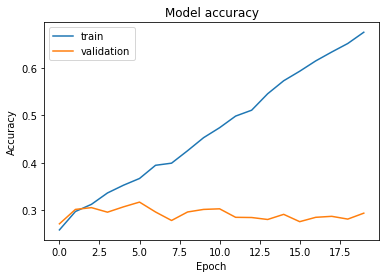

In [18]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
epochs = range('')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
print(f"Highest model accuracy is {round(max(train.history['val_accuracy'])*100,2)}% \
which occurs at {train.history['val_accuracy'].index(max(train.history['val_accuracy']))} epochs.")
     

Highest model accuracy is 31.71% which occurs at 5 epochs.
